In [20]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [6]:
#Read data and check 

path = '../drug_classification/drug200.csv'

df = pd.read_csv(path)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


# **Variable Description**

- Age: Age of patient
- Sex: Gender of patient
- BP: Blood pressure of patient
- Cholesterol: Cholesterol of patient
- Na_to_K: Sodium to Potassium Ratio in Blood
- Drug: Drug Type

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [11]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

- No missing value
- 6 columns
- 200 rows

**Univariate Variable Analysis**

In [16]:
#Age Variable

print('Max age: ',df.Age.max())
print('Min age: ',df.Age.min())

Max age:  74
Min age:  15


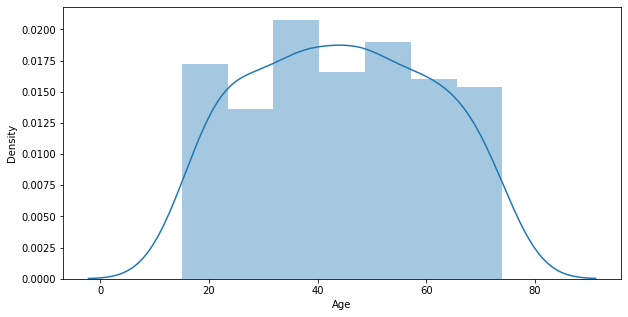

In [19]:
#Age distribution

plt.figure(figsize=(10,5))
sns.distplot(df.Age)
plt.show()

- Age range is between 15 and 74

In [21]:
#Sex Variable

df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

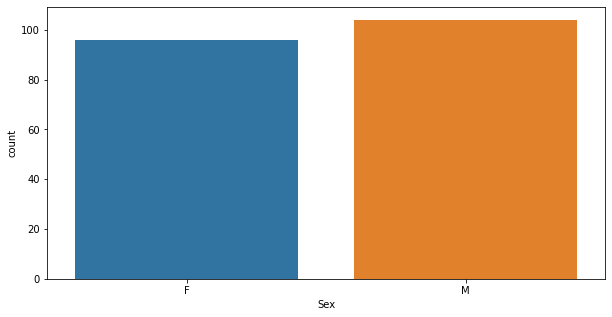

In [23]:
#Sex Distribution

plt.figure(figsize=(10,5))
sns.countplot(df.Sex)
plt.show()

- The ratio of gender seems balanced in the data
- This is a categorical variable. It would be better if we apply label encoder to avoid any error during model implementation.

In [24]:
#BP Variable
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

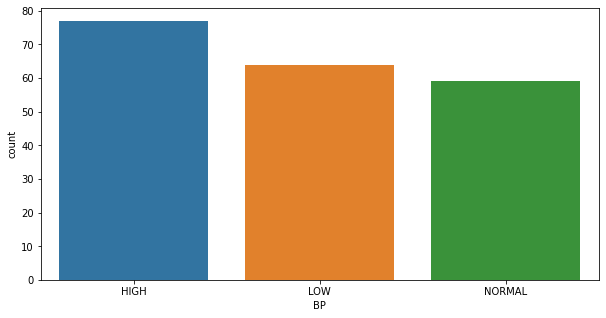

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(df.BP)
plt.show()

In [27]:
#Cholesterol Variable

df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

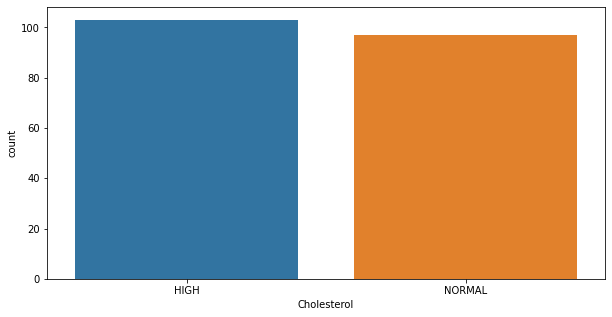

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(df.Cholesterol)
plt.show()

- Cholesterol is a balanced data.
- It is categorical and label encoder will apply on it.

In [32]:
#Na_to_K Variable

print('Max Na_to_K:',df.Na_to_K.max())
print('Min Na_to_K:',df.Na_to_K.min())
print('Mean Na_to_K:',df.Na_to_K.mean())

Max Na_to_K: 38.247
Min Na_to_K: 6.269
Mean Na_to_K: 16.084485


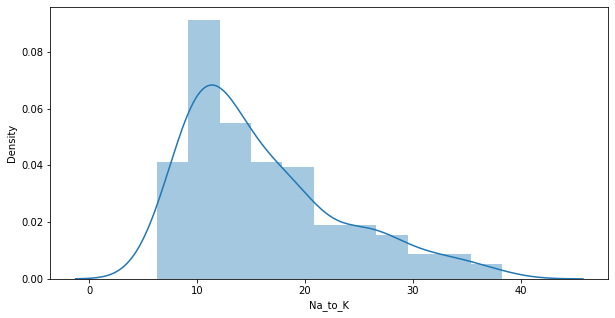

In [34]:
plt.figure(figsize=(10,5))
sns.distplot(df.Na_to_K)
plt.show()

In [35]:
#Drug Variable
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

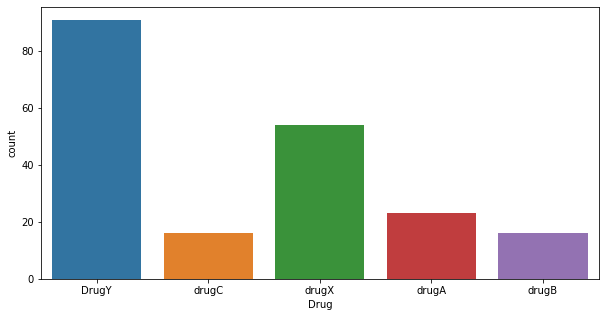

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(df.Drug)
plt.show()

- Drug is target column and you can see that it is unbalanced dataset. Using K Fold cross-validation would be better for reliable results.

# **Basic Data Analysis**

- Age -- Drug
- Sex -- Drug
- BP -- Drug
- Cholesterol -- Drug

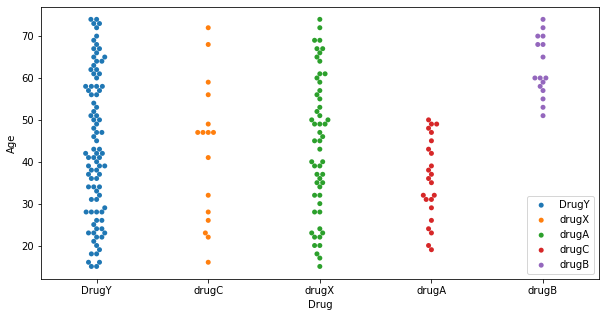

In [45]:
#Age--Drug

plt.figure(figsize=(10,5))
sns.swarmplot(x='Drug',y='Age',data=df)
plt.legend(df.Drug.value_counts().index)
plt.show()

In [55]:
print('Minimum Age of drugB: ',df.Age[df.Drug == 'drugB'].min())
print('Maximum Age of drugA: ',df.Age[df.Drug == 'drugA'].max())

Minimum Age of drugB:  51
Maximum Age of drugA:  50


- DrugB is taken only by older than 51 years old.
- DrugA is taken only by younger than 50 years old.

In [66]:
#Sex--Drug

df_sex_drug = df.groupby(['Drug','Sex']).size().reset_index(name='Count')
df_sex_drug

,Drug,Sex,Count
0,DrugY,F,47
1,DrugY,M,44
2,drugA,F,9
3,drugA,M,14
4,drugB,F,6
5,drugB,M,10
6,drugC,F,7
7,drugC,M,9
8,drugX,F,27
9,drugX,M,27


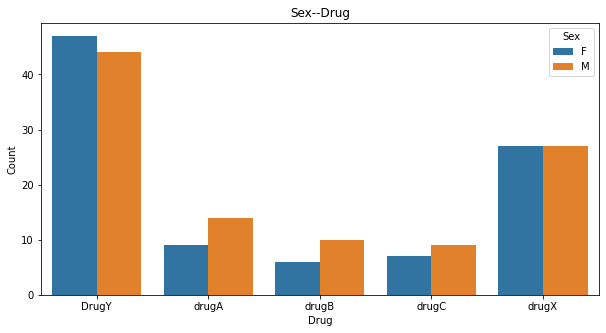

In [70]:
plt.figure(figsize=(10,5))
sns.barplot(x='Drug',y='Count',hue='Sex',data=df_sex_drug)
plt.title('Sex--Drug')
plt.show()

- Male people get drugA, drugB and drugC more than male people.
- Female people get DrugY more than female people.
- drugX seems equal for male and female people.
- According to this graph, Sex feature is not an important feature for classification.

In [71]:
#BP--Drug

df_bp_drug = df.groupby(['Drug','BP']).size().reset_index(name='Count')
df_bp_drug

,Drug,BP,Count
0,DrugY,HIGH,38
1,DrugY,LOW,30
2,DrugY,NORMAL,23
3,drugA,HIGH,23
4,drugB,HIGH,16
5,drugC,LOW,16
6,drugX,LOW,18
7,drugX,NORMAL,36


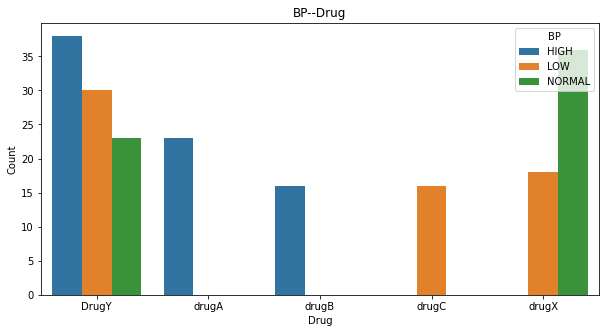

In [73]:
plt.figure(figsize=(10,5))
sns.barplot(x='Drug',y='Count',hue='BP',data=df_bp_drug)
plt.title('BP--Drug')
plt.show()

- drugA and drugB are got only by people who have HIGH blood pressure.
- drugC is got by people who have LOW blood pressure.
- drugX is got by people who have HIGH blood pressure.
- BP is an important feature for classification.

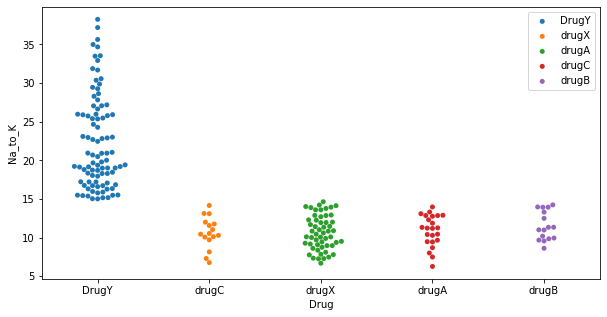

In [74]:
#Na_to_K -- Drug

plt.figure(figsize=(10,5))
sns.swarmplot(x='Drug',y='Na_to_K',data=df)
plt.legend(df.Drug.value_counts().index)
plt.show()

In [77]:
print('Minimum Na_to_K for DrugY:',df.Na_to_K[df.Drug == 'DrugY'].min())

Minimum Na_to_K for DrugY: 15.015


- People who have Na_to_K ratio is bigger than 15, get DrugY.
- We can create a new feature from here.

In [79]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [80]:
#Cholesterol -- Drug

df_cholesterol_drug = df.groupby(['Drug','Cholesterol']).size().reset_index(name='Count')
df_cholesterol_drug

,Drug,Cholesterol,Count
0,DrugY,HIGH,47
1,DrugY,NORMAL,44
2,drugA,HIGH,12
3,drugA,NORMAL,11
4,drugB,HIGH,8
5,drugB,NORMAL,8
6,drugC,HIGH,16
7,drugX,HIGH,20
8,drugX,NORMAL,34


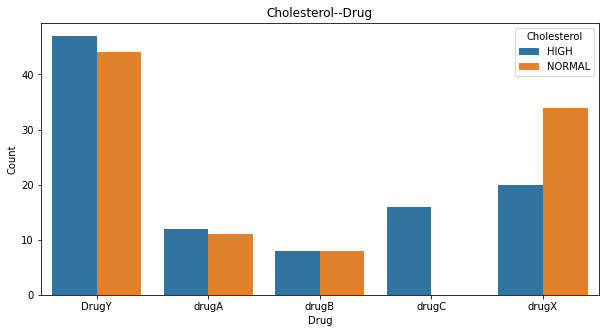

In [81]:
plt.figure(figsize=(10,5))
sns.barplot(x='Drug',y='Count',hue='Cholesterol',data=df_cholesterol_drug)
plt.title('Cholesterol--Drug')
plt.show()

- drugC is got by people who have HIGH cholesterol.
- Cholesterol is an important feature to classify drugC

In [83]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


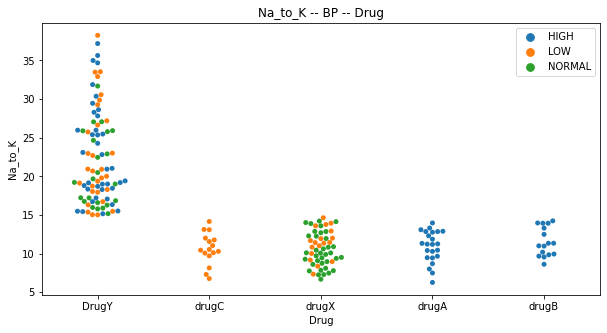

In [89]:
#Na_to_K--BP--Drug

plt.figure(figsize=(10,5))
sns.swarmplot(x='Drug',y='Na_to_K',hue='BP',data=df)
plt.title('Na_to_K -- BP -- Drug')
plt.legend()
plt.show()

In [91]:
df['Na_to_K'][df.Drug == 'DrugY'].min()

15.015

- If people have HIGH blood pressure and Na_to_K ratio is lower than 15 , they get drugA and drugB only.
- If people have LOW blood pressure and Na_to_K ratio is lower than 15 , they get drugC only.

# **Preparing Data and Feature Engineering**

**_Create new features_**

1. _Na_to_K_Bigger_Than_15_ : If Na_to_K is bigger than 15, it is always drugY.

In [96]:
df['Na_to_K_Bigger_Than_15'] = [1 if i >= df['Na_to_K'][df.Drug == 'DrugY'].min() else 0 for i in df['Na_to_K']]
df.head()            

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_Bigger_Than_15
0,23,F,HIGH,HIGH,25.355,DrugY,1
1,47,M,LOW,HIGH,13.093,drugC,0
2,47,M,LOW,HIGH,10.114,drugC,0
3,28,F,NORMAL,HIGH,7.798,drugX,0
4,61,F,LOW,HIGH,18.043,DrugY,1


In [100]:
df_NaK15 = df.groupby(['Drug','Na_to_K_Bigger_Than_15']).size().reset_index(name='Count')
df_NaK15

,Drug,Na_to_K_Bigger_Than_15,Count
0,DrugY,1,91
1,drugA,0,23
2,drugB,0,16
3,drugC,0,16
4,drugX,0,54


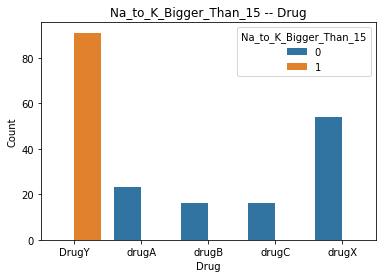

In [104]:
sns.barplot(x='Drug',y='Count',hue='Na_to_K_Bigger_Than_15',data=df_NaK15)
plt.title("Na_to_K_Bigger_Than_15 -- Drug")
plt.show()

- Na_to_K_Bigger_Than_15 feature will be important feature to drugY classification.

**Label Encoding**

Convert from object to int64

- Sex
- BP
- Cholesterol
- Na_to_K
- Na_to_K_Bigger_Than_15

In [106]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_Bigger_Than_15
0,23,F,HIGH,HIGH,25.355,DrugY,1
1,47,M,LOW,HIGH,13.093,drugC,0
2,47,M,LOW,HIGH,10.114,drugC,0
3,28,F,NORMAL,HIGH,7.798,drugX,0
4,61,F,LOW,HIGH,18.043,DrugY,1


In [108]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(x):
    le = LabelEncoder()
    df[x] = le.fit_transform(df[x])

In [110]:
label_list = ['Sex','BP','Cholesterol','Na_to_K','Na_to_K_Bigger_Than_15','Drug']

for l in label_list:
    label_encoder(l)

In [112]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_Bigger_Than_15
0,23,0,0,0,167,0,1
1,47,1,1,0,89,3,0
2,47,1,1,0,43,3,0
3,28,0,2,0,10,4,0
4,61,0,1,0,133,0,1


**Train Test Split**

In [131]:
from sklearn.model_selection import train_test_split

X = df.drop('Drug',axis=1)
y = df['Drug']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5,shuffle=True)

In [132]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (160, 6)
X_test shape: (40, 6)
y_train shape: (160, 1)
y_test shape: (40, 1)


Data was splitted as 80% train data and 20% test data.

# **Model Implementation**

- Trying three models and compare their results.
- Applying GridSearchCV method to find best score. 
- 5 Fold Cross Validation method will be used to be sure models' performance are random.

In [134]:
#To store results of models
result_dict_train = {}
result_dict_test = {}

**KNN Classifier**

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier()
accuracies = cross_val_score(knn,X_train,y_train,cv=5)
knn.fit(X_train,y_train)

print('Train score:',np.mean(accuracies))
print('Test score:',knn.score(X_test,y_test))

Train score: 0.61875
Test score: 0.675


In [137]:
result_dict_train['KNN Default Train Score'] = np.mean(accuracies)
result_dict_test['KNN Default Test Score'] = knn.score(X_test,y_test)

In [138]:
#GridSearchCV

from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': np.arange(1,120),
    'p': np.arange(1,3),
    'weights': ['uniform','distance']
}

knn_cv = GridSearchCV(knn,params,cv=5)
knn_cv.fit(X_train,y_train)

print("Hyperparameters:",knn_cv.best_params_)
print("Train Score:",knn_cv.best_score_)
print("Test Score:",knn_cv.score(X_test,y_test))

Hyperparameters: {'n_neighbors': 24, 'p': 1, 'weights': 'distance'}
Train Score: 0.725
Test Score: 0.725


In [140]:
result_dict_train["KNN GridSearch Train Score"] = knn_cv.best_score_
result_dict_test["KNN GridSearch Test Score"] = knn_cv.score(X_test,y_test)

**Random Forest**

In [143]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 5)
accuracies = cross_val_score(rfc, X_train, y_train, cv=5)
rfc.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(X_test,y_test))

Train Score: 0.9875
Test Score: 1.0


In [144]:
result_dict_train["Random Forest Default Train Score"] = np.mean(accuracies)
result_dict_test["Random Forest Default Test Score"] = rfc.score(X_test,y_test)

In [145]:
#GridSearchCV

params = {'n_estimators':np.arange(100,1000,100),
        'criterion':['gini','entropy']
       }

rf = RandomForestClassifier(random_state = 42)
rf_cv = GridSearchCV(rf,params,cv=5)
rf_cv.fit(X_train,y_train)

print("Hyperparameters:",rf_cv.best_params_)
print("Train Score:",rf_cv.best_score_)
print("Test Score:",rf_cv.score(X_test,y_test))

Hyperparameters: {'criterion': 'gini', 'n_estimators': 100}
Train Score: 0.9875
Test Score: 1.0


In [146]:
result_dict_train["Random Forest GridSearch Train Score"] = rf_cv.best_score_
result_dict_test["Random Forest GridSearch Test Score"] = rf_cv.score(X_test,y_test)

**SVM Classifier**

In [147]:
from sklearn.svm import SVC
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(X_test,y_test))

Train Score: 0.70625
Test Score: 0.7


In [148]:
result_dict_train["SVM Default Train Score"] = np.mean(accuracies)
result_dict_test["SVM Default Test Score"] = svc.score(X_test,y_test)

In [149]:
#GridSearchCV
grid = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

svm  = SVC();
svm_cv = GridSearchCV(svm, grid, cv = 5)
svm_cv.fit(X_train,y_train)
print("Best Parameters:",svm_cv.best_params_)
print("Train Score:",svm_cv.best_score_)
print("Test Score:",svm_cv.score(X_test,y_test))

Best Parameters: {'C': 1, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}
Train Score: 0.975
Test Score: 0.975


In [151]:
result_dict_train["SVM GridSearch Train Score"] = svm_cv.best_score_
result_dict_test["SVM GridSearch Test Score"] = svm_cv.score(X_test,y_test)

# Conclusion

In [152]:
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index",columns=["Score"])
df_result_train

,Score
KNN Default Train Score,0.61875
KNN GridSearch Train Score,0.72500
Random Forest Default Train Score,0.98750
Random Forest GridSearch Train Score,0.98750
SVM Default Train Score,0.70625
SVM GridSearch Train Score,0.97500


In [153]:
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
df_result_test

,Score
KNN Default Test Score,0.675
KNN GridSearch Test Score,0.725
Random Forest Default Test Score,1.000
Random Forest GridSearch Test Score,1.000
SVM Default Test Score,0.700
SVM GridSearch Test Score,0.975


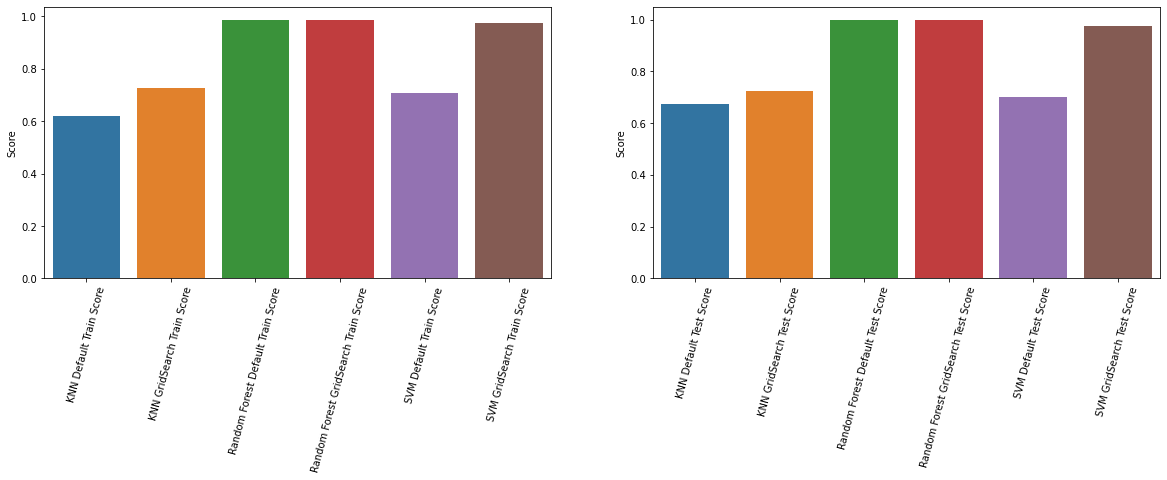

In [155]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=df_result_train.index, y=df_result_train.Score,ax=ax[0])
sns.barplot(x = df_result_test.index,y = df_result_test.Score,ax=ax[1])
ax[0].set_xticklabels(df_result_train.index,rotation = 75)
ax[1].set_xticklabels(df_result_test.index,rotation = 75)
plt.show()

- Random Forest classifier and SVM classifier (after hyperparameter tuning) have a good scores.
- KNN classifier has worst score in three clasifiers.